# CAP 6619 - Deep Learning
## Project 4
## Image classification using the CIFAR-10 dataset

Inspired by:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 6s 0us/step


### Part 2: Explore dataset

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


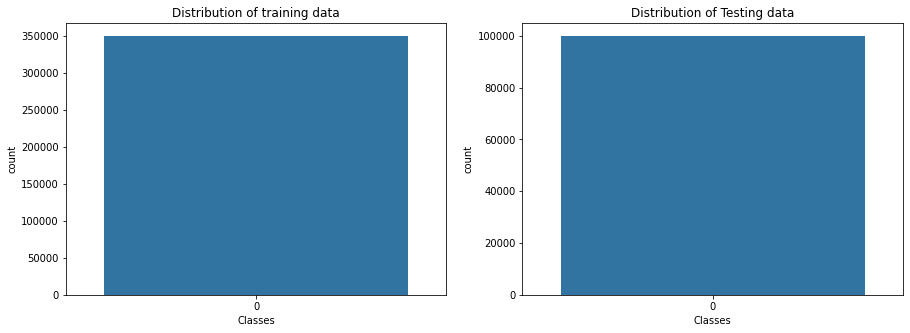

In [ ]:
# Distribution of classes in training samples

fig, axs = plt.subplots(1,2,figsize=(15,5))
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

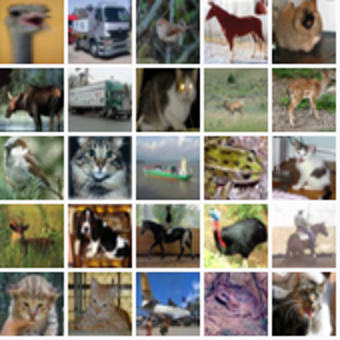

In [ ]:
# Show collage of 25 (randomly selected) images

height_width = 32


def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

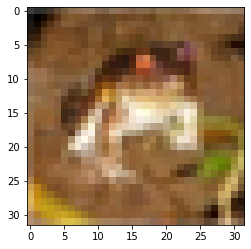

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Part 3: Build your 1st model

In this case we will start by using a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 40
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Part 4: Train your first model

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 [==============================] - 18s 16ms/step - loss: 2.0352 - accuracy: 0.2509 - val_loss: 1.7838 - val_accuracy: 0.3824
Epoch 2/40
391/391 [==============================] - 6s 14ms/step - loss: 1.7359 - accuracy: 0.3720 - val_loss: 1.6083 - val_accuracy: 0.4192
Epoch 3/40
391/391 [==============================] - 5s 13ms/step - loss: 1.6050 - accuracy: 0.4178 - val_loss: 1.5033 - val_accuracy: 0.4557
Epoch 4/40
391/391 [==============================] - 6s 14ms/step - loss: 1.5275 - accuracy: 0.4454 - val_loss: 1.4254 - val_accuracy: 0.4834
Epoch 5/40
391/391 [==============================] - 5s 13ms/step - loss: 1.4571 - accuracy: 0.4751 - val_loss: 1.3500 - val_accuracy: 0.5176
Epoch 6/40
391/391 [==============================] - 5s 14ms/step - loss: 1.4012 - accuracy: 0.4953 - val_loss: 1.2903 - val_accuracy: 0.5403
Epoch 7/40
391/391 [==============================] - 5s 13ms/step - loss: 1.3433 - accuracy: 0.5218 - val_loss: 1.2512 - val_accuracy: 0.556

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


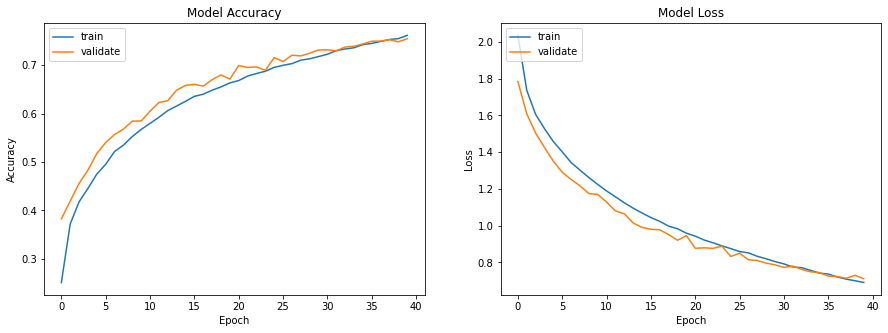

In [ ]:
plotmodelhistory(history)

### Part 5: Evaluate your 1st model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7115 - accuracy: 0.7549
Test loss: 0.7114588618278503
Test accuracy: 0.7548999786376953
313/313 [==============================] - 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

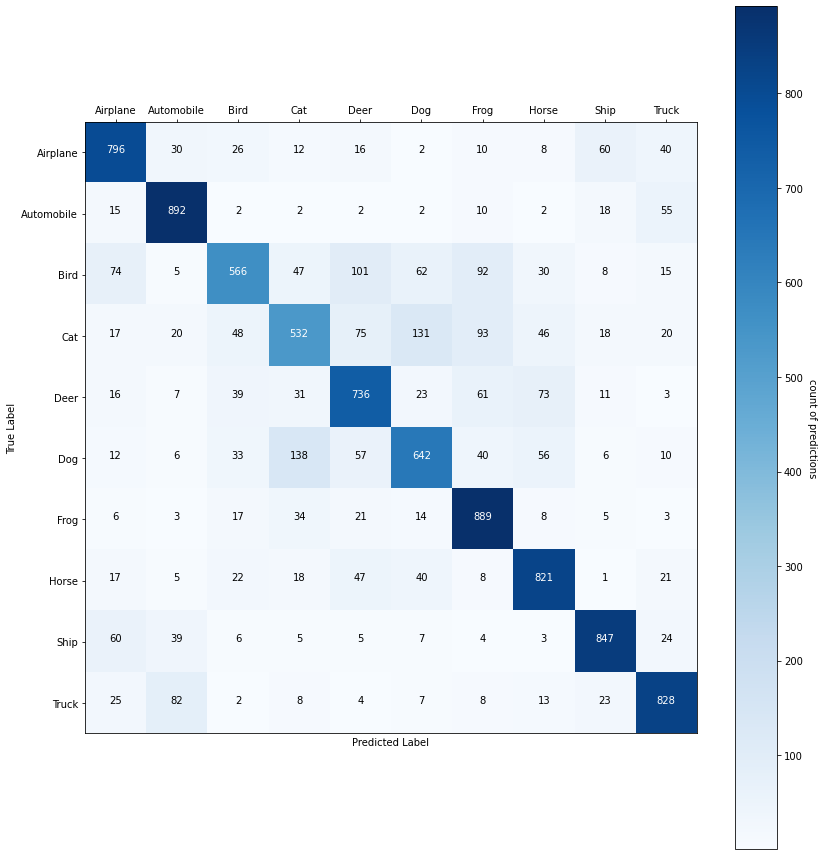

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1000
           1       0.82      0.89      0.85      1000
           2       0.74      0.57      0.64      1000
           3       0.64      0.53      0.58      1000
           4       0.69      0.74      0.71      1000
           5       0.69      0.64      0.67      1000
           6       0.73      0.89      0.80      1000
           7       0.77      0.82      0.80      1000
           8       0.85      0.85      0.85      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



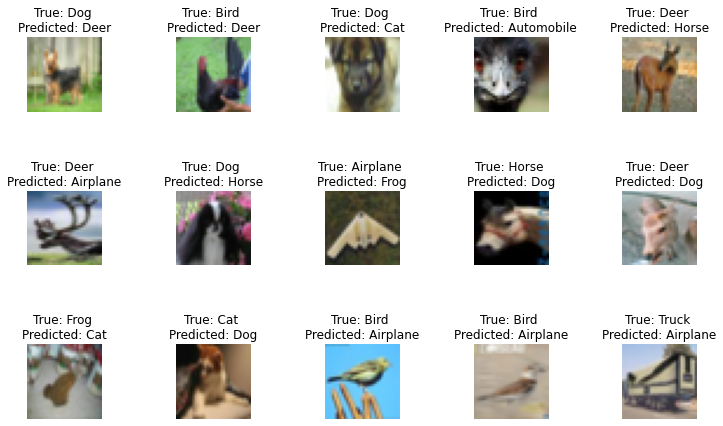

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 111ms/step


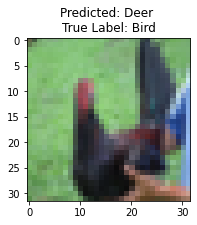

In [ ]:
show_test(25)

### Part 6: Transfer Learning

#### Transfer Learning: setup

In [ ]:
from keras import Sequential
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
batch_size= 128
epochs=10
learn_rate=.003

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 37s 82ms/step - loss: 1.2613 - accuracy: 0.5572 - val_loss: 0.9490 - val_accuracy: 0.6690
Epoch 2/10
274/274 [==============================] - 20s 73ms/step - loss: 0.6653 - accuracy: 0.7730 - val_loss: 0.7432 - val_accuracy: 0.7495
Epoch 3/10
274/274 [==============================] - 20s 73ms/step - loss: 0.4362 - accuracy: 0.8491 - val_loss: 0.8494 - val_accuracy: 0.7249
Epoch 4/10
274/274 [==============================] - 21s 75ms/step - loss: 0.2911 - accuracy: 0.9003 - val_loss: 0.8979 - val_accuracy: 0.7415
Epoch 5/10
274/274 [==============================] - 20s 73ms/step - loss: 0.2120 - accuracy: 0.9281 - val_loss: 0.8847 - val_accuracy: 0.7551
Epoch 6/10
274/274 [==============================] - 20s 74ms/step - loss: 0.1568 - accuracy: 0.9477 - val_loss: 0.9273 - val_accuracy: 0.7669
Epoch 7/10
274/274 [==============================] - 20s 75ms/step - loss: 0.1328 - accuracy: 0.9559 - val_loss: 0.9546 - val_accuracy:

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


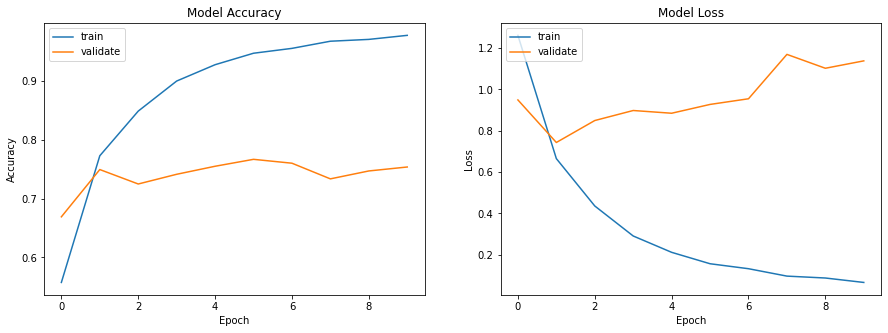

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1999 - accuracy: 0.7510
Test loss: 1.1998876333236694
Test accuracy: 0.7509999871253967
313/313 [==============================] - 4s 10ms/step


In [ ]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

313/313 [==============================] - 1s 2ms/step


Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

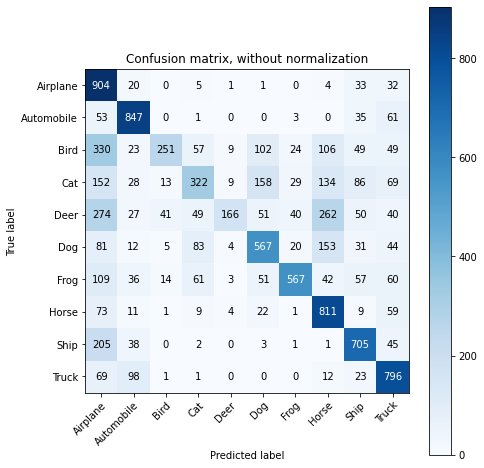

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

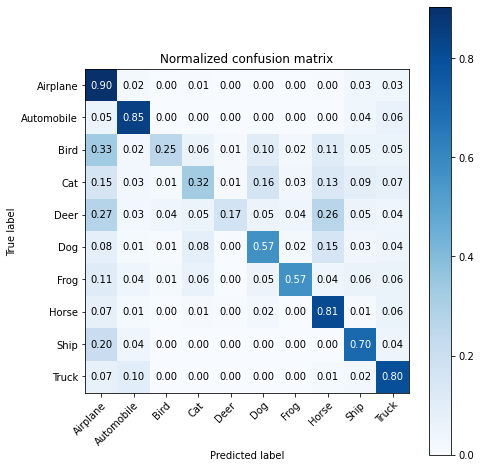

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

#### Attempt #2: Your turn!

Write code to build, train, and evaluate *another* transfer learning model.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)









#####SAMPLE SOLUTION

The code below uses the same base model and simply changes optimizer and other hyperparameters.

In [ ]:
base_model_4 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_4=Sequential()
#Add the Dense layers along with activation and batch normalization
model_4.add(base_model_4)
model_4.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_4.add(Dense(4000,activation=('relu'),input_dim=512))
model_4.add(Dense(2000,activation=('relu')))
model_4.add(Dense(1000,activation=('relu')))
model_4.add(Dense(500,activation=('relu')))
model_4.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
# Compile the model
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

model_4.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_4 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 59s 84ms/step - loss: 1.4672 - accuracy: 0.4907 - val_loss: 1.3467 - val_accuracy: 0.6131
Epoch 2/10
274/274 [==============================] - 22s 81ms/step - loss: 0.8569 - accuracy: 0.7253 - val_loss: 2.0289 - val_accuracy: 0.5496
Epoch 3/10
274/274 [==============================] - 21s 78ms/step - loss: 0.6825 - accuracy: 0.7791 - val_loss: 1.0165 - val_accuracy: 0.6913
Epoch 4/10
274/274 [==============================] - 22s 79ms/step - loss: 0.5662 - accuracy: 0.8189 - val_loss: 1.0576 - val_accuracy: 0.6929
Epoch 5/10
274/274 [==============================] - 22s 81ms/step - loss: 0.4959 - accuracy: 0.8424 - val_loss: 1.7571 - val_accuracy: 0.4685
Epoch 6/10
274/274 [==============================] - 22s 81ms/step - loss: 0.5466 - accuracy: 0.8273 - val_loss: 1.4788 - val_accuracy: 0.6236
Epoch 7/10
274/274 [==============================] - 21s 78ms/step - loss: 0.3878 - accuracy: 0.8747 - val_loss: 0.8792 - val_accuracy:

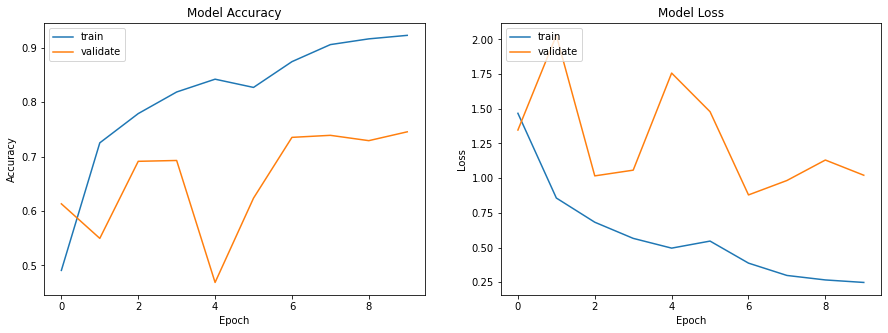

In [ ]:
plotmodelhistory(history_4)

In [ ]:
# Score trained model.
scores = model_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_4.predict(x_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0324 - accuracy: 0.7400
Test loss: 1.0323737859725952
Test accuracy: 0.7400000095367432
313/313 [==============================] - 4s 10ms/step


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


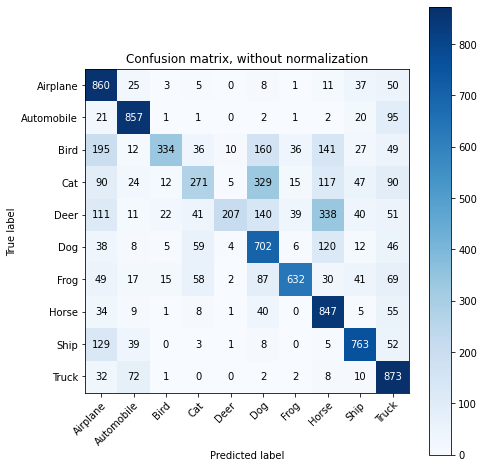

In [ ]:
predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


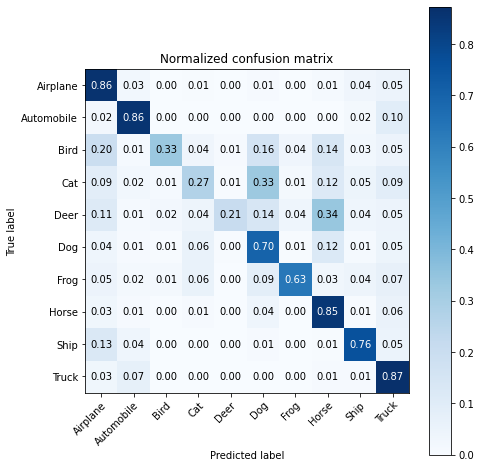

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

### Summary table
(updated)

| Method | Test accuracy | Remarks |
| --- | --- | --- |
| Baseline CNN | 0.751 | Cats and dogs likely to be misclassified |
| Transfer learning using pre-trained CNN (ResNet50) | 0.740| Disappointly low, signs of overfitting |


### Conclusions

In this assignment we learned about image classification using the CIFAR-10 data set. I learned that the CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. I identified the classes and plotted the result into graphs that I then evaluated for this assignment. I really like using this data set and experienced how the machine learning of these can have error so simple for a human but hard to identify for a machine.  